In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup as BS
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
world_edu_rank = pd.read_csv('data/world_edu_rank.csv')
country_codes = pd.read_csv('data/country_codes.csv')
fide_ratings = pd.read_csv('data/upd_fide_ratings.csv')

In [4]:
fide_ratings.loc[fide_ratings['country'] == "IND", 'country'] = "India" #I missed a row

In [7]:
fide_ratings

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,APR23,Gms,K,B-day,Flag,rank,country,a3
0,25121731,A C J John,IND,M,NaN,NaN,NaN,NaN,1063,0,40,1987,i,101.0,India,IND
1,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,101.0,India,IND
2,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,NaN,Bangladesh,NaN
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,NaN,NaN,NaN,NaN,1728,0,40,2001,i,84.0,Egypt,EGY
4,5716365,"A Hamid, Harman",MAS,M,NaN,NaN,NaN,NaN,1325,0,40,1970,i,NaN,Malaysia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413943,34190632,"Zyubin, Sergey",RUS,M,NaN,NaN,NaN,NaN,1884,0,40,1975,i,19.0,Russia,RUS
413944,55746969,"Zyuganov, Igor",RUS,M,NaN,NaN,NaN,NaN,1325,0,40,2010,NaN,19.0,Russia,RUS
413945,24232602,"Zyuzev, Pavel",RUS,M,NaN,NaN,NaN,NaN,1856,0,40,1993,i,19.0,Russia,RUS
413946,1189980,"Zywert, Kacper",POL,M,NaN,NaN,NaN,NaN,1519,0,20,1999,i,20.0,Poland,POL


In [8]:
class_es_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 1000) & (fide_ratings['APR23'] <= 1200)]['country'].value_counts()).reset_index()
class_ds_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 1200) & (fide_ratings['APR23'] <= 1400)]['country'].value_counts()).reset_index()
class_cs_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 1400) & (fide_ratings['APR23'] <= 1600)]['country'].value_counts()).reset_index()
class_bs_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 1600) & (fide_ratings['APR23'] <= 1800)]['country'].value_counts()).reset_index()
class_as_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 1800) & (fide_ratings['APR23'] <= 2000)]['country'].value_counts()).reset_index()
cms_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 2000) & (fide_ratings['APR23'] <= 2200)]['country'].value_counts()).reset_index()
nms_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 2200) & (fide_ratings['APR23'] <= 2300)]['country'].value_counts()).reset_index()
fms_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 2300) & (fide_ratings['APR23'] <= 2400)]['country'].value_counts()).reset_index()
ims_by_cntry = pd.DataFrame(fide_ratings[(fide_ratings['APR23'] >= 2400) & (fide_ratings['APR23'] <= 2500)]['country'].value_counts()).reset_index()
gms_by_cntry = pd.DataFrame(fide_ratings[fide_ratings['APR23'] >= 2500]['country'].value_counts()).reset_index()
all_players_by_cntry = pd.DataFrame(fide_ratings['country'].value_counts()).reset_index()

In [9]:
def change_column_names(dataframe, rank):
    return dataframe.rename(columns={"index": "country", "country": rank + "s"})

In [10]:
class_es_by_cntry = change_column_names(class_es_by_cntry, "class_e_player")
class_ds_by_cntry = change_column_names(class_ds_by_cntry, "class_d_player")
class_cs_by_cntry = change_column_names(class_cs_by_cntry, "class_c_player")
class_bs_by_cntry = change_column_names(class_bs_by_cntry, "class_b_player")
class_as_by_cntry = change_column_names(class_as_by_cntry, "class_a_player")
cms_by_cntry = change_column_names(cms_by_cntry, "candidate_master")
nms_by_cntry = change_column_names(nms_by_cntry, "national_master")
fms_by_cntry = change_column_names(fms_by_cntry, "fide_master")
ims_by_cntry = change_column_names(ims_by_cntry, "international_master")
gms_by_cntry = change_column_names(gms_by_cntry, "grandmaster")
all_players_by_cntry = change_column_names(all_players_by_cntry, "all_player")

In [11]:
class_cs_by_cntry['class_c_players'].sum()

75376

In [12]:
cms_by_cntry

,country,candidate_masters
0,Germany,6655
1,Russia,5835
2,Spain,2656
3,France,2126
4,United States,1566
...,...,...
161,Gabon,1
162,Sao Tome and Principe,1
163,Cambodia,1
164,Togo,1


In [13]:
class_cs_by_cntry

,country,class_c_players
0,Spain,6634
1,France,6131
2,India,5627
3,Russia,5530
4,Germany,3924
...,...,...
188,Gabon,1
189,Seychelles,1
190,Virgin Islands (UK),1
191,Sierra Leone,1


In [14]:
world_edu_rank = world_edu_rank.rename(columns={"rank":"edu_rank"})

In [15]:
world_edu_rank

,edu_rank,country
0,1,Denmark
1,2,South Korea
2,3,Netherlands
3,4,Germany
4,5,Ireland
...,...,...
198,199,Kosovo
199,200,Democratic Republic of the Congo
200,201,Andorra
201,202,South Sudan


In [16]:
fide_ratings

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,APR23,Gms,K,B-day,Flag,rank,country,a3
0,25121731,A C J John,IND,M,NaN,NaN,NaN,NaN,1063,0,40,1987,i,101.0,India,IND
1,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,101.0,India,IND
2,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,NaN,Bangladesh,NaN
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,NaN,NaN,NaN,NaN,1728,0,40,2001,i,84.0,Egypt,EGY
4,5716365,"A Hamid, Harman",MAS,M,NaN,NaN,NaN,NaN,1325,0,40,1970,i,NaN,Malaysia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413943,34190632,"Zyubin, Sergey",RUS,M,NaN,NaN,NaN,NaN,1884,0,40,1975,i,19.0,Russia,RUS
413944,55746969,"Zyuganov, Igor",RUS,M,NaN,NaN,NaN,NaN,1325,0,40,2010,NaN,19.0,Russia,RUS
413945,24232602,"Zyuzev, Pavel",RUS,M,NaN,NaN,NaN,NaN,1856,0,40,1993,i,19.0,Russia,RUS
413946,1189980,"Zywert, Kacper",POL,M,NaN,NaN,NaN,NaN,1519,0,20,1999,i,20.0,Poland,POL


In [17]:
player_breakdowns_by_cntry = pd.merge(pd.merge(class_es_by_cntry, class_ds_by_cntry, on='country', how='left'), pd.merge(class_cs_by_cntry, class_bs_by_cntry, on='country', how='left'), on='country', how='left')

In [18]:
player_breakdowns_by_cntry = pd.merge(pd.merge(player_breakdowns_by_cntry, class_as_by_cntry, how='left'), pd.merge(cms_by_cntry, nms_by_cntry, on='country', how='left'), on='country', how='left')

In [19]:
player_breakdowns_by_cntry = pd.merge(pd.merge(player_breakdowns_by_cntry, fms_by_cntry, how='left'), pd.merge(ims_by_cntry, gms_by_cntry, on='country', how='left'), on='country', how='left')

In [20]:
player_breakdowns_by_cntry = pd.merge(player_breakdowns_by_cntry, all_players_by_cntry, on='country', how='left')

In [21]:
player_breakdowns_by_cntry = pd.merge(player_breakdowns_by_cntry, world_edu_rank, on='country', how='inner')

In [22]:
player_breakdowns_by_cntry['all_players'].sum()

406008

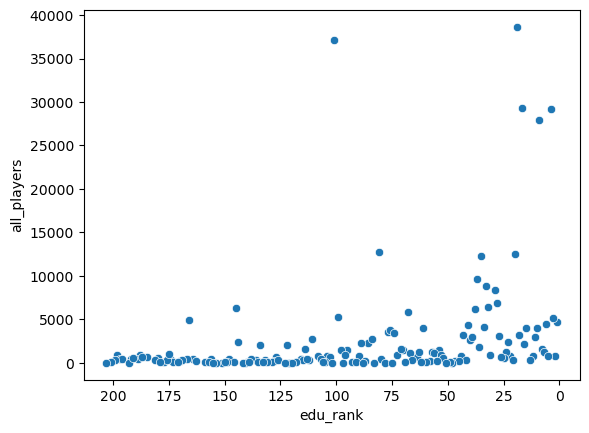

In [23]:
ax = sns.scatterplot(data=player_breakdowns_by_cntry, x='edu_rank', y='all_players')
ax.invert_xaxis()

In [24]:
pearson_players_x_edu_rank = player_breakdowns_by_cntry['all_players'].corr(203 - player_breakdowns_by_cntry['edu_rank'])
pearson_players_x_edu_rank

0.33075413713720786

There is a insignificant correlation between a country's education rank and its number of chess players.

I inverted the ranking number since a higher number is more people but a lower ranking is better on the education rankings. Same for all of these.

In [25]:
hr_players_by_country = player_breakdowns_by_cntry[['country', 'edu_rank', 'candidate_masters', 'national_masters', 'international_masters', 'fide_masters', 'grandmasters']]

hr_players_by_country['all_players'] = hr_players_by_country['candidate_masters'] + hr_players_by_country['national_masters'] + hr_players_by_country['international_masters'] + hr_players_by_country['fide_masters'] + hr_players_by_country['grandmasters']

C:\Users\hdg\AppData\Local\Temp\ipykernel_11012\1991839699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_players_by_country['all_players'] = hr_players_by_country['candidate_masters'] + hr_players_by_country['national_masters'] + hr_players_by_country['international_masters'] + hr_players_by_country['fide_masters'] + hr_players_by_country['grandmasters']


In [26]:
hr_players_by_country['country']

0                 India
1                Russia
2                France
3                  Iran
4                 Spain
             ...       
156             Liberia
157    Papua New Guinea
158          Mauritania
159          Seychelles
160                Mali
Name: country, Length: 161, dtype: object

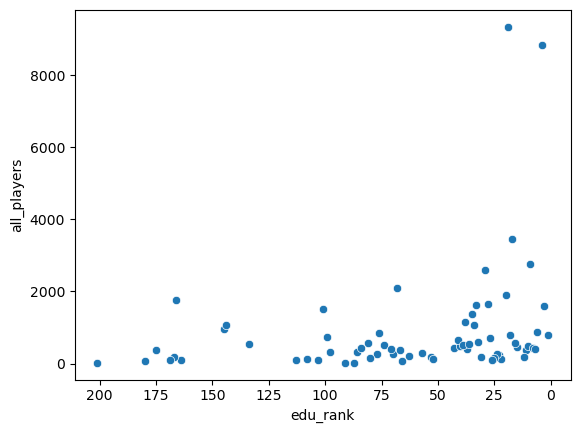

In [27]:
ax = sns.scatterplot(data=hr_players_by_country, x='edu_rank', y='all_players')
ax.invert_xaxis()

In [28]:
pearson_high_ranked_players_x_edu_rank = hr_players_by_country['all_players'].corr(203 - hr_players_by_country['edu_rank'])
pearson_high_ranked_players_x_edu_rank

0.2634346591463202

There is a similarly insignificant correlation between highly ranked chess players and education.

In [29]:
pearson_gms_x_edu_rank = hr_players_by_country['grandmasters'].corr(203 - hr_players_by_country['edu_rank'])
pearson_gms_x_edu_rank

0.16841861464271643

Grandmasters have even less of an correlation between education ranks.

I wanted to make sure the comparison of a ranking and an aggregation wasn't causing any weirdness so I'm ranking the countries on chess players and seeing the correlation of those two rankings.

In [30]:
player_breakdowns_by_cntry['player_no_rank'] = player_breakdowns_by_cntry['all_players'].rank(ascending=False)

In [31]:
player_breakdowns_by_cntry

,country,class_e_players,class_d_players,class_c_players,class_b_players,class_a_players,candidate_masters,national_masters,fide_masters,international_masters,grandmasters,all_players,edu_rank,player_no_rank
0,India,14308,11182.0,5627.0,2963.0,1685.0,1075.0,204.0,118.0,64.0,46.0,37110,101,2.0
1,Russia,6000,6037.0,5530.0,5859.0,6077.0,5835.0,1916.0,1116.0,367.0,114.0,38650,19,1.0
2,France,4381,5867.0,6131.0,5184.0,3752.0,2126.0,391.0,158.0,52.0,28.0,27916,9,5.0
3,Iran,3146,3237.0,2887.0,1973.0,1023.0,426.0,78.0,35.0,17.0,8.0,12769,81,6.0
4,Spain,2881,5067.0,6634.0,6414.0,4981.0,2656.0,489.0,197.0,86.0,24.0,29286,17,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Liberia,1,5.0,14.0,24.0,9.0,NaN,NaN,NaN,NaN,NaN,52,150,138.0
157,Papua New Guinea,1,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,NaN,10,123,159.5
158,Mauritania,1,9.0,35.0,27.0,18.0,3.0,NaN,NaN,NaN,NaN,93,139,129.0
159,Seychelles,1,5.0,1.0,5.0,1.0,6.0,1.0,NaN,NaN,NaN,19,51,153.0


In [32]:
corr_spear_edu_rank_x_players_rank, pval_spear_edu_rank_x_players_rank = stats.spearmanr(player_breakdowns_by_cntry['edu_rank'], player_breakdowns_by_cntry['player_no_rank'], nan_policy='omit')

There's more a correlation between player total rank and education rank, and the likelihood that its random chance is nearly zero. We're getting somewhere it seems.

In [33]:
hr_players_by_country['player_no_rank'] = hr_players_by_country['all_players'].rank(ascending=False)

C:\Users\hdg\AppData\Local\Temp\ipykernel_11012\594440871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_players_by_country['player_no_rank'] = hr_players_by_country['all_players'].rank(ascending=False)


In [34]:
hr_players_by_country['gm_no_rank'] = hr_players_by_country['grandmasters'].rank(ascending=False)

C:\Users\hdg\AppData\Local\Temp\ipykernel_11012\1545943686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_players_by_country['gm_no_rank'] = hr_players_by_country['grandmasters'].rank(ascending=False)


In [35]:
hr_players_by_country

,country,edu_rank,candidate_masters,national_masters,international_masters,fide_masters,grandmasters,all_players,player_no_rank,gm_no_rank
0,India,101,1075.0,204.0,64.0,118.0,46.0,1507.0,12.0,4.0
1,Russia,19,5835.0,1916.0,367.0,1116.0,114.0,9348.0,1.0,1.0
2,France,9,2126.0,391.0,52.0,158.0,28.0,2755.0,4.0,8.5
3,Iran,81,426.0,78.0,17.0,35.0,8.0,564.0,27.0,30.0
4,Spain,17,2656.0,489.0,86.0,197.0,24.0,3452.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...
156,Liberia,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,Papua New Guinea,123,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
158,Mauritania,139,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Seychelles,51,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
corr_spear_hi_ranked_players_x_edu_rank, pval_spear_hi_ranked_players_x_edu_rank = stats.spearmanr(hr_players_by_country['edu_rank'], hr_players_by_country['player_no_rank'], nan_policy='omit')

In [37]:
corr_spear_gms_x_edu_rank, pval_spear_gms_x_edu_rank = stats.spearmanr(hr_players_by_country['edu_rank'], hr_players_by_country['gm_no_rank'], nan_policy='omit')

As we look at higher and higher quality players, the less it actually correlates with education ranks. Grandmasters is a huge plummet, and there's a higher chance that its merely random chance.

So at this point while education is a factor and has an influence on the number of chess players, it isn't the primary factor. I want to control for gdp and population to see if that's a better predictor of chess players.

In [38]:
global_gdp_and_population = pd.read_csv('data/gdp_and_population_data.csv')

In [39]:
global_gdp_and_population

,pop,id,imfGDP,unGDP,country,gdpPerCapita,continent,rank
0,3.399966e+05,840,2.669515e+13,18624475000000,United States,7.851594e+04,North America,1
1,5.050000e-03,840,2.669515e+13,18624475000000,United States,5.286168e+12,North America,2
2,1.425671e+06,156,2.186548e+13,11218281029298,China,1.533697e+04,Asia,3
3,-1.500000e-04,156,2.186548e+13,11218281029298,China,-1.457699e+14,Asia,4
4,1.232945e+05,392,5.291351e+12,4936211827875,Japan,4.291635e+04,Asia,5
...,...,...,...,...,...,...,...,...
419,8.260000e-03,788,0.000000e+00,41703561397,Tunisia,5.048857e+09,Africa,420
420,4.606200e+01,796,0.000000e+00,917550492,Turks and Caicos Islands,1.991990e+04,North America,421
421,7.860000e-03,796,0.000000e+00,917550492,Turks and Caicos Islands,1.167367e+08,North America,422
422,3.674463e+04,804,0.000000e+00,93270354852,Ukraine,2.538339e+03,Europe,423


In [40]:
global_gdp_and_population = global_gdp_and_population[global_gdp_and_population['pop'] >= 1][['pop', 'imfGDP', 'country', 'gdpPerCapita']].reset_index()

In [41]:
player_breakdowns_by_cntry = pd.merge(left = player_breakdowns_by_cntry, right = global_gdp_and_population, on='country', how='left')

<AxesSubplot:xlabel='imfGDP', ylabel='all_players'>

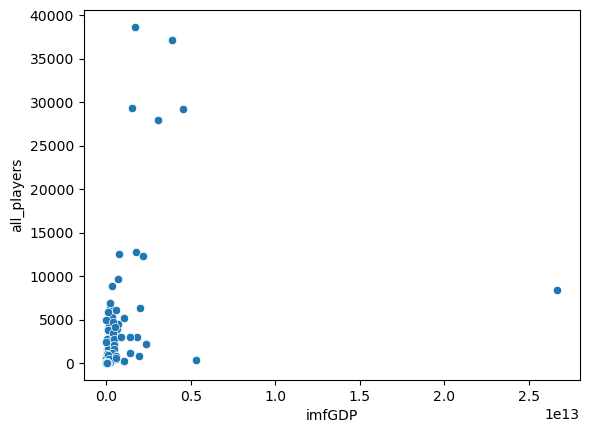

In [42]:
sns.scatterplot(data=player_breakdowns_by_cntry, x='imfGDP', y='all_players')

In [43]:
pear_players_x_gdp = player_breakdowns_by_cntry['all_players'].corr(player_breakdowns_by_cntry['imfGDP'])

In [76]:
player_breakdowns_by_cntry['all_players'].corr(player_breakdowns_by_cntry['pop'])

0.38593566050341527

In [77]:
player_breakdowns_by_cntry['all_players'].corr(player_breakdowns_by_cntry['grandmasters'])

0.7086024411365095

In [78]:
player_breakdowns_by_cntry['pop'].corr(player_breakdowns_by_cntry['grandmasters'])

0.3673618804343051

In [44]:
pear_players_x_gdp_p_capita = player_breakdowns_by_cntry['all_players'].corr(player_breakdowns_by_cntry['gdpPerCapita'])

There's actually a negative correlation with gdp per capita (albeit an extremely slight one), which is wild

In [72]:
correlation_table = player_breakdowns_by_cntry.corr()

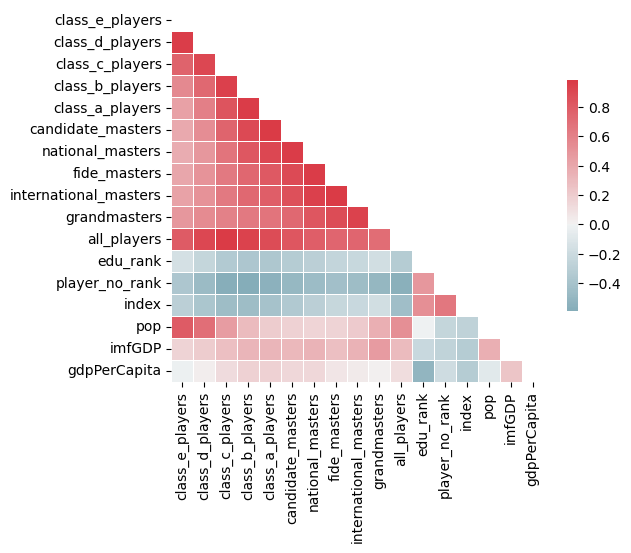

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = player_breakdowns_by_cntry.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

General population is correlated really highly with low-level players but doesn't seem to be the case for higher-ranked ones.

The most interesting thing here is that edu_rank correlates negatively with gdpPerCapita, which is interesting, but outside  the scope of this analysis.

In [47]:
player_breakdowns_by_cntry['players_by_capita'] = player_breakdowns_by_cntry['all_players'] / player_breakdowns_by_cntry['pop']

In [48]:
player_breakdowns_by_cntry['pbc_rank'] = player_breakdowns_by_cntry['players_by_capita'].rank(ascending=False)

In [49]:
player_breakdowns_by_cntry.sort_values(by='players_by_capita')

,country,class_e_players,class_d_players,class_c_players,class_b_players,class_a_players,candidate_masters,national_masters,fide_masters,international_masters,grandmasters,all_players,edu_rank,player_no_rank,index,pop,imfGDP,gdpPerCapita,players_by_capita,pbc_rank
152,Cambodia,2,1.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,8,120,161.0,206.0,16944.826,3.023900e+10,1784.556537,0.000472,156.0
160,Mali,1,NaN,2.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,15,155,158.0,232.0,23293.698,2.119100e+10,909.731035,0.000644,155.0
129,Tanzania,6,16.0,19.0,17.0,3.0,NaN,NaN,NaN,NaN,NaN,61,149,136.0,140.0,67438.106,8.615200e+10,1277.497325,0.000905,154.0
157,Papua New Guinea,1,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,NaN,10,123,159.5,198.0,10329.931,3.233400e+10,3130.127394,0.000968,153.0
140,Cameroon,2,2.0,5.0,10.0,8.0,2.0,NaN,NaN,NaN,NaN,29,141,147.0,178.0,28647.293,4.951800e+10,1728.540285,0.001012,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,China,98,215.0,379.0,355.0,251.0,257.0,121.0,75.0,54.0,37.0,1833,36,45.0,NaN,NaN,NaN,NaN,NaN,NaN
72,Hong Kong,64,88.0,74.0,56.0,41.0,20.0,1.0,2.0,1.0,NaN,346,21,100.0,NaN,NaN,NaN,NaN,NaN,NaN
79,Republic of Macedonia,50,48.0,67.0,80.0,71.0,101.0,41.0,14.0,9.0,2.0,482,167,87.0,NaN,NaN,NaN,NaN,NaN,NaN
137,Cote d’Ivoire,4,4.0,10.0,17.0,7.0,4.0,NaN,NaN,NaN,NaN,46,135,141.5,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
player_breakdowns_by_cntry[player_breakdowns_by_cntry['pop'].isna()]

,country,class_e_players,class_d_players,class_c_players,class_b_players,class_a_players,candidate_masters,national_masters,fide_masters,international_masters,grandmasters,all_players,edu_rank,player_no_rank,index,pop,imfGDP,gdpPerCapita,players_by_capita,pbc_rank
58,China,98,215.0,379.0,355.0,251.0,257.0,121.0,75.0,54.0,37.0,1833,36,45.0,NaN,NaN,NaN,NaN,NaN,NaN
72,Hong Kong,64,88.0,74.0,56.0,41.0,20.0,1.0,2.0,1.0,NaN,346,21,100.0,NaN,NaN,NaN,NaN,NaN,NaN
79,Republic of Macedonia,50,48.0,67.0,80.0,71.0,101.0,41.0,14.0,9.0,2.0,482,167,87.0,NaN,NaN,NaN,NaN,NaN,NaN
137,Cote d’Ivoire,4,4.0,10.0,17.0,7.0,4.0,NaN,NaN,NaN,NaN,46,135,141.5,NaN,NaN,NaN,NaN,NaN,NaN
155,Macau (PRC),1,8.0,10.0,2.0,11.0,9.0,1.0,NaN,NaN,NaN,41,62,143.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
player_breakdowns_by_cntry[player_breakdowns_by_cntry['country'] == 'India']

,country,class_e_players,class_d_players,class_c_players,class_b_players,class_a_players,candidate_masters,national_masters,fide_masters,international_masters,grandmasters,all_players,edu_rank,player_no_rank,index,pop,imfGDP,gdpPerCapita,players_by_capita,pbc_rank
0,India,14308,11182.0,5627.0,2963.0,1685.0,1075.0,204.0,118.0,64.0,46.0,37110,101,2.0,8.0,1428627.663,3.893670e+12,2725.461715,0.025976,108.0


In [52]:
player_breakdowns_by_cntry.loc[player_breakdowns_by_cntry['country'] == "China ", 'pop'] =  1412000000 / 1000

In [53]:
player_breakdowns_by_cntry.loc[player_breakdowns_by_cntry['country'] == "Republic of Macedonia", 'pop'] = 2065000 / 1000

In [54]:
player_breakdowns_by_cntry.loc[player_breakdowns_by_cntry['country'] == "Hong Kong ", 'pop'] = 7413000 / 1000

In [55]:
player_breakdowns_by_cntry.loc[player_breakdowns_by_cntry['country'] == "Cote d’Ivoire", 'pop'] = 27480000 / 1000

In [56]:
player_breakdowns_by_cntry.loc[player_breakdowns_by_cntry['country'] == "Macau (PRC)", 'pop'] = 686607 / 1000

In [57]:
corr_spear_players_p_capita_x_edu_rank, pval_spear_players_p_capita_x_edu_rank = stats.spearmanr(player_breakdowns_by_cntry['pbc_rank'], player_breakdowns_by_cntry['edu_rank'], nan_policy='omit')

In [58]:
player_breakdowns_by_cntry['high_rank_players'] = player_breakdowns_by_cntry['candidate_masters'] + player_breakdowns_by_cntry['national_masters'] + player_breakdowns_by_cntry['international_masters'] + player_breakdowns_by_cntry['fide_masters'] + player_breakdowns_by_cntry['grandmasters']

In [59]:
player_breakdowns_by_cntry['hr_rank'] = player_breakdowns_by_cntry['high_rank_players'].rank(ascending=False)

In [60]:
corr_spear_players_p_capita_x_high_rank_players, pval_spear_players_p_capita_x_high_rank_players = stats.spearmanr(player_breakdowns_by_cntry['pbc_rank'], player_breakdowns_by_cntry['hr_rank'], nan_policy='omit')

In [61]:
stats.spearmanr(player_breakdowns_by_cntry['pbc_rank'], player_breakdowns_by_cntry['hr_rank'], nan_policy='omit')

SpearmanrResult(correlation=0.2865977020269496, pvalue=0.017813725917018002)

In [62]:
player_breakdowns_by_cntry.to_csv('data/main_table.csv')

In [63]:
%whos

Variable                                          Type                       Data/Info
--------------------------------------------------------------------------------------
BS                                                type                       <class 'bs4.BeautifulSoup'>
all_players_by_cntry                              DataFrame                                           <...>n\n[197 rows x 2 columns]
ax                                                AxesSubplot                AxesSubplot(0.125,0.185;0.62x0.62)
change_column_names                               function                   <function change_column_n<...>es at 0x000002521A61C430>
class_as_by_cntry                                 DataFrame                                           <...>n\n[184 rows x 2 columns]
class_bs_by_cntry                                 DataFrame                                           <...>n\n[194 rows x 2 columns]
class_cs_by_cntry                                 DataFrame                  

There's definitely a better way to do this, but I manually built a lil table to hold the correlation scores.

In [64]:
corr_values = pd.DataFrame({"method": pd.Series(dtype="str"),
                            "var_X": pd.Series(dtype="str"),
                            "var_Y": pd.Series(dtype="str"),
                            "corr_value": pd.Series(dtype="float"),
                            "pvalue": pd.Series(dtype="float")})

In [65]:
corr_values

,method,var_X,var_Y,corr_value,pvalue


In [66]:
corr_values.loc[0, 'corr_value'] = pear_players_x_gdp
corr_values.loc[1, 'corr_value'] = pear_players_x_gdp_p_capita
corr_values.loc[2, 'corr_value'] = pearson_gms_x_edu_rank
corr_values.loc[3, 'corr_value'] = pearson_high_ranked_players_x_edu_rank
corr_values.loc[4, 'corr_value'] = pearson_players_x_edu_rank
corr_values.loc[5, 'corr_value'] = corr_spear_edu_rank_x_players_rank
corr_values.loc[6, 'corr_value'] = corr_spear_gms_x_edu_rank
corr_values.loc[7, 'corr_value'] = corr_spear_hi_ranked_players_x_edu_rank
corr_values.loc[8, 'corr_value'] = corr_spear_players_p_capita_x_edu_rank 
corr_values.loc[9, 'corr_value'] = corr_spear_players_p_capita_x_high_rank_players

In [67]:
corr_values.loc[0, 'var_Y'] = "gdp"
corr_values.loc[1, 'var_Y'] = "gdp_p_capita"
corr_values.loc[2, 'var_Y'] = "edu_rank"
corr_values.loc[3, 'var_Y'] = "edu_rank"
corr_values.loc[4, 'var_Y'] = "edu_rank"
corr_values.loc[5, 'var_Y'] = "edu_rank"
corr_values.loc[6, 'var_Y'] = "edu_rank"
corr_values.loc[7, 'var_Y'] = "edu_rank"
corr_values.loc[8, 'var_Y'] = "edu_rank" 
corr_values.loc[9, 'var_Y'] = "hr_players"

In [68]:
corr_values.loc[0, 'var_X'] = "all_players"
corr_values.loc[1, 'var_X'] = "all_players"
corr_values.loc[2, 'var_X'] = "grandmasters"
corr_values.loc[3, 'var_X'] = "hr_players"
corr_values.loc[4, 'var_X'] = "all_players"
corr_values.loc[5, 'var_X'] = "all_players_rank"
corr_values.loc[6, 'var_X'] = "gms_rank"
corr_values.loc[7, 'var_X'] = "hr_rank"
corr_values.loc[8, 'var_X'] = "players_p_capita_rank" 
corr_values.loc[9, 'var_X'] = "players_p_capita_rank"

In [69]:
corr_values.loc[5, 'pvalue'] = pval_spear_edu_rank_x_players_rank
corr_values.loc[6, 'pvalue'] = pval_spear_gms_x_edu_rank
corr_values.loc[7, 'pvalue'] = pval_spear_hi_ranked_players_x_edu_rank
corr_values.loc[8, 'pvalue'] = pval_spear_players_p_capita_x_edu_rank 
corr_values.loc[9, 'pvalue'] = pval_spear_players_p_capita_x_high_rank_players

In [70]:
corr_values.loc[0, 'method'] = "Pearson"
corr_values.loc[1, 'method'] = "Pearson"
corr_values.loc[2, 'method'] = "Pearson"
corr_values.loc[3, 'method'] = "Pearson"
corr_values.loc[4, 'method'] = "Pearson"
corr_values.loc[5, 'method'] = "Spearman's Rank"
corr_values.loc[6, 'method'] = "Spearman's Rank"
corr_values.loc[7, 'method'] = "Spearman's Rank"
corr_values.loc[8, 'method'] = "Spearman's Rank" 
corr_values.loc[9, 'method'] = "Spearman's Rank"

In [71]:
corr_values.to_csv('data/corr_values.csv')

In [75]:
correlation_table.to_csv('data/corr_values2.csv')